In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split

In [19]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97156\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

## IMPORT DATASET

In [2]:
train = pd.read_excel("C:\\Users\\97156\\Desktop\\moaz\\WORK\\Participants_Data_News_category\\Data_Train.xlsx")

In [4]:
test = pd.read_excel("C:\\Users\\97156\\Desktop\\moaz\\WORK\\Participants_Data_News_category\\Data_Test.xlsx")

In [5]:
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [6]:
test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


<table><tr><td>Politics: 0</td></tr>
<tr><td>Technology: 1</td></tr>
<tr><td>Entertainment: 2</td></tr>
<tr><td>Business: 3</td></tr>

## EXPLORATORY ANALYSIS

In [7]:
train.columns

Index(['STORY', 'SECTION'], dtype='object')

In [20]:
train.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  We will leave no stone unturned to make the au...    3
3        1246   1233  This story has been published from a wire agen...   11

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
STORY      7628 non-null object
SECTION    7628 non-null int64
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [13]:
train.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [14]:
test.isnull().sum()

STORY    0
dtype: int64

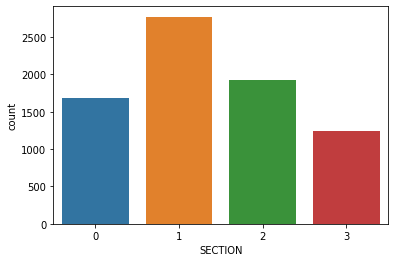

In [16]:
sns.countplot(x = 'SECTION', data = train)

## DATA PRE-PROCESSING

In [21]:
# remove duplicates

train.drop_duplicates(inplace = True)

In [22]:
all_punctuations = string.punctuation + '‘’,:”][],' 

In [23]:
# Remove punctuation

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [24]:
# Remove stop words

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [25]:
# lemmatize the words in the data

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [26]:
# perform a complete cleaning

def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [27]:
# Testing 

text_cleaner("Hi!, this is a sample text to test the text cleaner method. Removes *@!#special characters%$^* and stopwords. And lemmatizes, go, going - run, ran, running")

'Hi sample text test text cleaner method Removes special character stopwords And lemmatizes go go run run run'

In [28]:
# Apply the cleaner method to the entire dataset

train['CLEAN_STORY'] = train['STORY'].apply(text_cleaner)

In [29]:
print(train.values)

[['But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that Yes Bank took it for granted that fees on structured loan deals will be paid and accounted for upfront on its books. As borrowers turned defaulters, the fees tied to these loan deals fell off the cracks. Gill has now vowed to shift to a safer accounting practice of amortizing fee income rather than booking these upfront.\n\n\nGill’s move to mend past ways means that there will be no nasty surprises in the future. This is good news considering that investors love a clean image and loathe uncertainties.\n\n\nBut there is no gain without pain and the promise of a strong and stable balance sheet comes with some sacrifices as well. Investors will have to give up the hopes of phenomenal growth, a promise made by Kapoor.'
  3
  'But painful huge reversal fee income unheard among private sector lenders Essentially mean Yes Bank take grant fee structure loan deal pay 

In [30]:
train.head()

,STORY,SECTION,CLEAN_STORY
0,But the most painful was the huge reversal in ...,3,But painful huge reversal fee income unheard a...
1,How formidable is the opposition alliance amon...,0,How formidable opposition alliance among Congr...
2,Most Asian currencies were trading lower today...,3,Most Asian currencies trade lower today South ...
3,"If you want to answer any question, click on ‘...",1,If want answer question click Answer After cli...
4,"In global markets, gold prices edged up today ...",3,In global market gold price edge today disappo...


## Count Vectors and TF-IDF Vectors

<h3>Creat counter vector

In [31]:
# Importing sklearn’s Countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

#Creating a bag-of-words dictionary of words from the data

bow_dictionary = CountVectorizer().fit(train['CLEAN_STORY'])

In [32]:
#Total number of words in the bow_dictionary
len(bow_dictionary.vocabulary_)

35189

In [33]:
#Using the bow_dictionary to create count vectors for the cleaned data.

bow = bow_dictionary.transform(train['CLEAN_STORY'])

In [34]:
#Printing the shape of the bag of words model
print(bow.shape)

(7551, 35189)


<h3> Create TF-IDF

In [35]:
# Importing TfidfTransformer from sklearn

from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
# Fitting the bag of words data to the TF-IDF transformer

tfidf_transformer = TfidfTransformer().fit(bow)

In [37]:
# Transforming the bag of words model to TF-IDF vectors

storytfidf = tfidf_transformer.transform(bow)

<h3> Training dataset

In [38]:
# Creating a Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

In [40]:
#Fitting the training data to the classifier

classifier = MultinomialNB().fit(storytfidf, train['SECTION'])

<h3> Predicting Dataset

In [41]:
test['CLEAN_STORY'] = test['STORY'].apply(text_cleaner)

<h5>Create pipeline

In [42]:
#  Importing the Pipeline module from sklearn
from sklearn.pipeline import Pipeline

#  Initializing the pipeline with necessary transformations and the required classifier
pipe = Pipeline([('bow', CountVectorizer()),('tfidf', TfidfTransformer()),('classifier', MultinomialNB())])


In [43]:
# Fitting the training data to the pipeline
pipe.fit(train['CLEAN_STORY'], train['SECTION'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
#  Predicting  
test_pred = pipe.predict(test['CLEAN_STORY'])

In [46]:
test_pred

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [51]:
#  Writing the predictions to an excel sheet
#pd.DataFrame(test_pred, columns = ['SECTION']).to_excel("predictions.xlsx")

pd.DataFrame(test_pred, columns = ['SECTION'])

,SECTION
0,1
1,2
2,1
3,1
4,1
...,...
2743,1
2744,1
2745,1
2746,0
